<a href="https://colab.research.google.com/github/MINED30/EATA/blob/main/Segformer_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Street View Panorama From Google

In [ ]:
!git clone https://github.com/cplusx/google-street-view-panorama-download

fatal: destination path 'google-street-view-panorama-download' already exists and is not an empty directory.


In [ ]:
%cd google-street-view-panorama-download/

/content/google-street-view-panorama-download


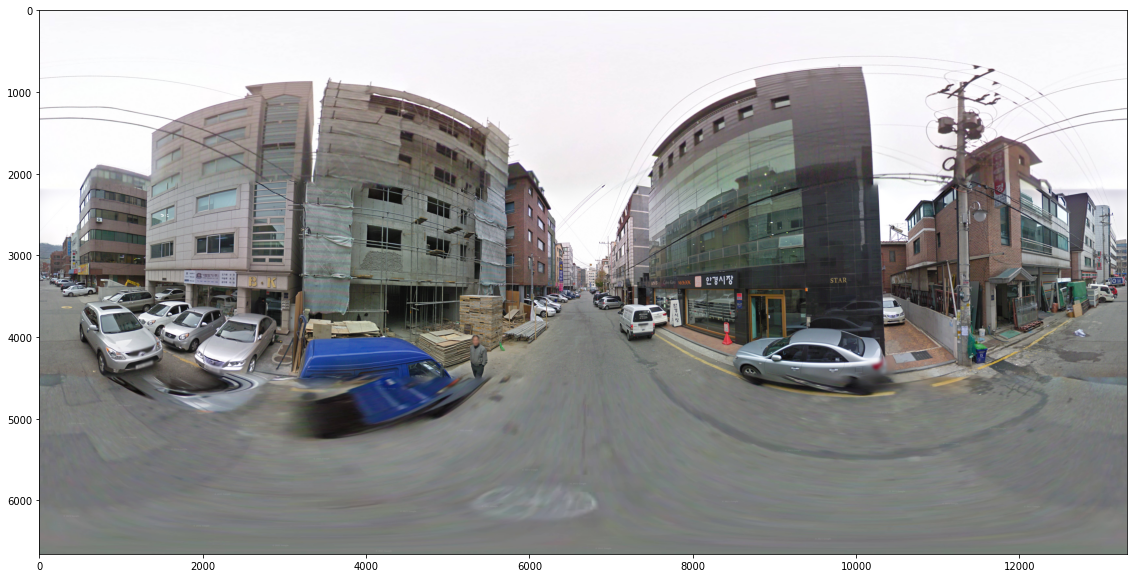

In [ ]:
import streetview
import matplotlib.pyplot as plt

panoids = streetview.panoids(lat=37.47676083, lon=127.0467272)
panoid = panoids[0]['panoid']
panorama = streetview.download_panorama_v3(panoid, zoom=5, disp=False)
plt.figure(figsize=(30,10))
plt.imshow(panorama)
plt.show()

# SegFormer HuggingFace

In [ ]:
!pip install transformers

In [ ]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024")

# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)

inputs = feature_extractor(images=panorama, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits # shape (batch_size, num_labels, height/4, width/4)

In [ ]:
model.config.id2label

{0: 'road',
 1: 'sidewalk',
 2: 'building',
 3: 'wall',
 4: 'fence',
 5: 'pole',
 6: 'traffic light',
 7: 'traffic sign',
 8: 'vegetation',
 9: 'terrain',
 10: 'sky',
 11: 'person',
 12: 'rider',
 13: 'car',
 14: 'truck',
 15: 'bus',
 16: 'train',
 17: 'motorcycle',
 18: 'bicycle'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


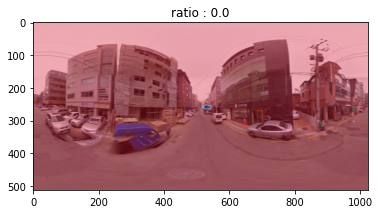

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
mask_ = np.array((logits.argmax(dim=1)[0,:,:]==8).int())
# mask_ = np.array(((logits.argmax(dim=1)[0,:,:]==6)|(logits.argmax(dim=1)[0,:,:]==20)|(logits.argmax(dim=1)[0,:,:]==80)).int())
mask = resize(mask_, (512, 1024))
back_ = np.array(((inputs['pixel_values'][0].permute(1,2,0)+1.9638)/4.6038))
back = resize(back_,(512,1024))
plt.figure()
plt.title(f"ratio : {round(mask_.mean(),2)}")
plt.imshow(back)
plt.imshow(mask,cmap='bwr_r',interpolation='nearest', alpha=0.3)
plt.show()